In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.datasets import EmnistDataset, EmnistLinesDataset, Transpose, construct_image_from_string, get_samples_by_character

In [3]:
emnist_lines = EmnistLinesDataset(train=True)

2020-08-09 20:45:35.945 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_load_data:160 - EmnistLinesDataset loading data from HDF5...


In [4]:
def convert_y_label_to_string(y, emnist_lines=emnist_lines):
    return ''.join([emnist_lines.mapper(int(i)) for i in y])

412 We____________________________
new_______________________________
decided___________________________
indictment the 10000 bond was_____
of possessions and living plays___
Lillys____________________________
life______________________________
in circles making_________________
enlist____________________________


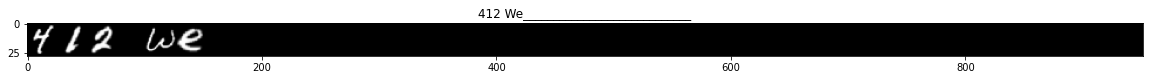

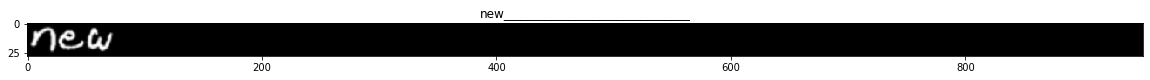

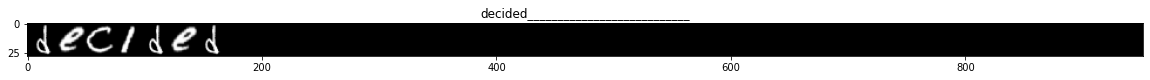

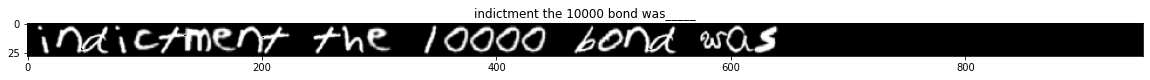

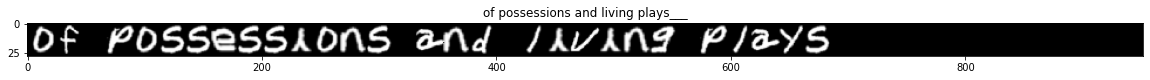

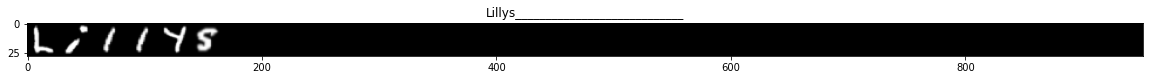

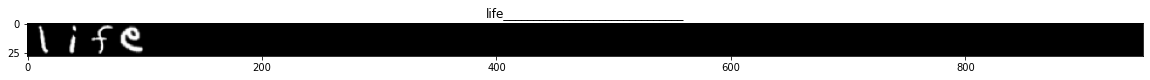

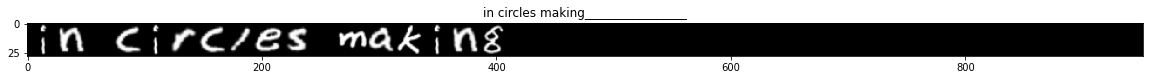

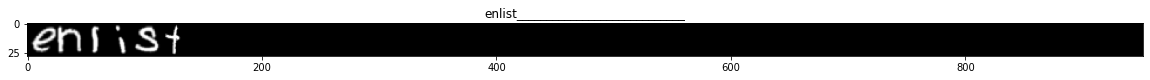

In [5]:
num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    data, target = emnist_lines[i]
    sentence = convert_y_label_to_string(target.numpy()) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0), cmap='gray')

In [7]:
data.shape

torch.Size([1, 28, 952])

In [21]:
from text_recognizer.networks.misc import sliding_window

In [34]:
data, target = emnist_lines[8]

In [35]:
data.shape

torch.Size([1, 28, 952])

In [36]:
target.shape

torch.Size([34])

In [37]:
patches = sliding_window(images=data.unsqueeze(0), patch_size=(28, 28), stride=(1, 14))

In [38]:
patches.shape

torch.Size([1, 67, 28, 28])

In [39]:
# remove batch size
patches = patches.squeeze(0)

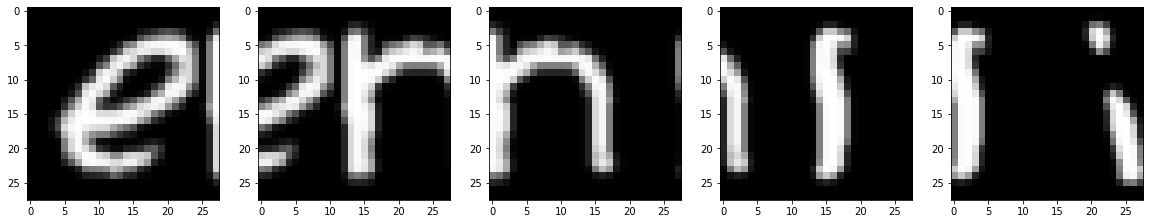

In [48]:
fig = plt.figure(figsize=(20, 20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(patches[i].squeeze(0), cmap='gray')

# Testing the data loader for EmnistLines

In [49]:
from text_recognizer.datasets.util import fetch_data_loaders

In [50]:
dls = fetch_data_loaders(["train"], "EmnistLinesDataset", {}, batch_size=16, shuffle=True, cuda=False)

2020-08-09 22:34:07.398 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_load_data:159 - EmnistLinesDataset loading data from HDF5...


In [51]:
dl = dls["train"]

In [52]:
d, t = next(iter(dl))

In [53]:
d.shape

torch.Size([16, 1, 28, 952])

In [54]:
t.shape

torch.Size([16, 34])

In [55]:
patches = sliding_window(images=d, patch_size=(28, 28), stride=(1, 14))

In [56]:
patches.shape

torch.Size([16, 67, 28, 28])

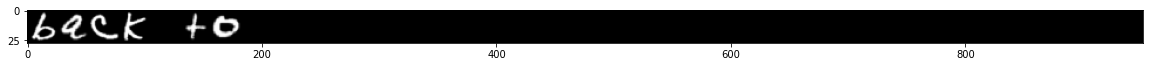

In [59]:
plt.figure(figsize=(20, 20))
plt.imshow(d[0, 0], cmap='gray')

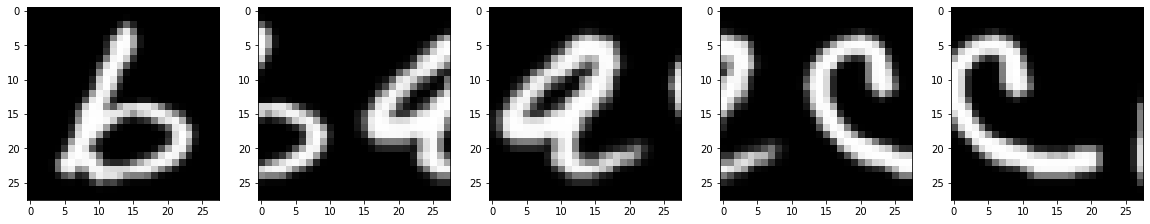

In [57]:
fig = plt.figure(figsize=(20, 20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(patches[0, i].squeeze(0), cmap='gray')